In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import random
from scipy.optimize import curve_fit

In [7]:
def delays(novelties,flag):
    delay = np.diff(novelties)
    delay = np.array([i for i in delay if i!=1])
    delay = np.array([i-1 for i in delay])
    if(flag == True):
        return np.log(delay)
    else:
        return delay

In [3]:
book0= np.genfromtxt('seed123456_book0.txt',dtype=str)

In [5]:
random.seed()

In [6]:
np.random.shuffle(book0)

In [8]:
np.savetxt('book0_shuffled.txt',book0,fmt='%s')

In [8]:
novelties_0_reshuff = np.loadtxt('novelties_book0_shuffled.txt')
novelties_0 = np.loadtxt('novelties_book0.txt')
novelties_6 = np.loadtxt('novelties_6.txt')
novelties_6_sh = np.loadtxt('nov_shuff_6.txt')
novelties_4 = np.loadtxt('novelties_4.txt')
novelties_8 = np.loadtxt('novelties_8.txt')

In [9]:
delay_shuff = delays(novelties_0_reshuff,False)
delay_ = delays(novelties_0,False)
delay4 = delays(novelties_4,False)
delay6 = delays(novelties_6,False)
delay6_sh = delays(novelties_6_sh,False)
delay8 = delays(novelties_8,False)

In [10]:
unique = np.unique(delay_,return_counts=True)
unique6 = np.unique(delay6,return_counts=True)
unique_shuff= np.unique(delay_shuff,return_counts=True)
unique8 = np.unique(delay8,return_counts=True)
unique4 = np.unique(delay4,return_counts=True)

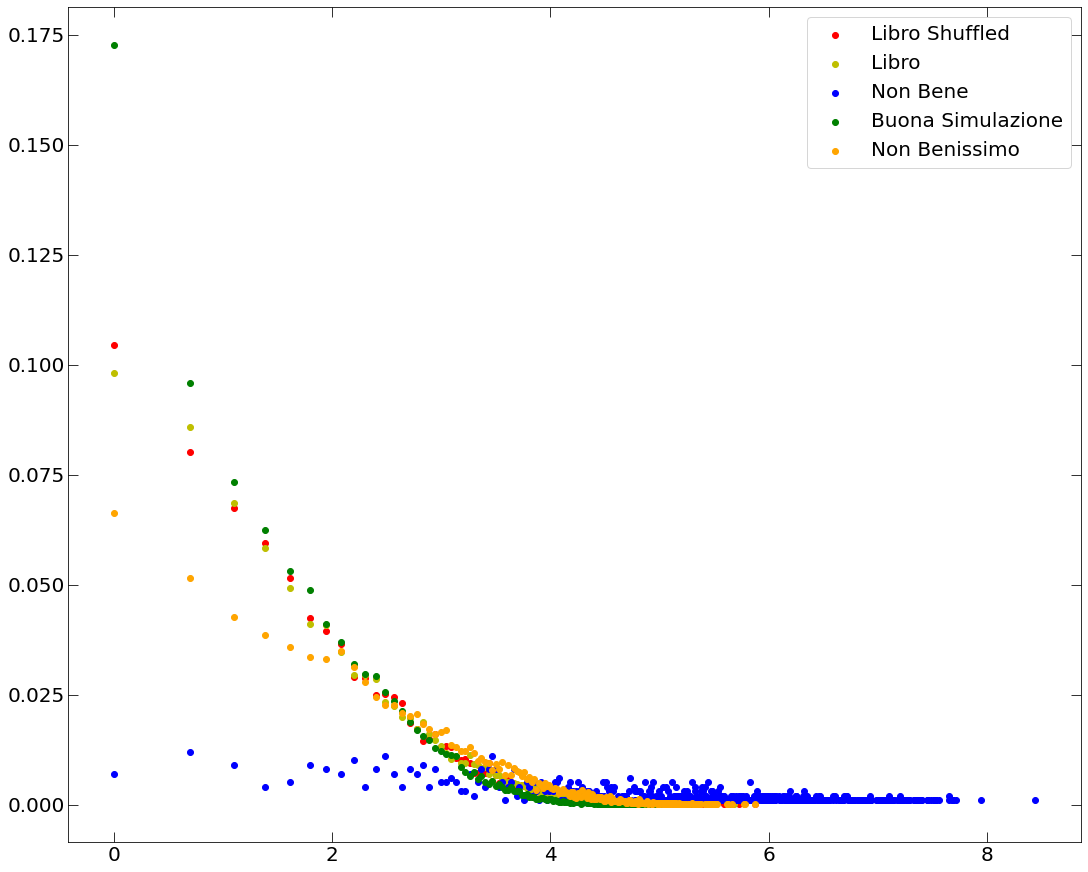

In [257]:
fig, axs = plt.subplots(figsize=(15,12),constrained_layout=True)
#fig.suptitle(r'Distribution of $\ln$(Delays) for several simulations',fontsize=16)
#axs.set_xscale('log')
#axs.scatter(np.log(unique[0][5:]),unique[1][5:]*unique[0][5:]/np.sum(unique[1]),color = 'y',label=r'Libro')
#axs.scatter(np.log(unique[0][:5]),unique[1][:5]/np.sum(unique[1]),color = 'y',label=r'Libro')
axs.scatter(np.log(unique_shuff[0]),unique_shuff[1]/np.sum(unique_shuff[1]),color = 'r',label=r'Libro Shuffled')
axs.scatter(np.log(unique[0]),unique[1]/np.sum(unique[1]),color = 'y',label=r'Libro')
#axs.hist(np.log(unique),,,)
axs.scatter(np.log(unique4[0]),unique4[1]/np.sum(unique4[1]),color = 'blue',label=r'Non Bene')
axs.scatter(np.log(unique6[0]),unique6[1]/np.sum(unique6[1]),color = 'g',label=r'Buona Simulazione')
axs.scatter(np.log(unique8[0]),unique8[1]/np.sum(unique8[1]),color = 'orange',label=r'Non Benissimo')
#axs.plot(np.ones(50)*(3.5),np.arange(0,50)*0.001)
axs.xaxis.set_tick_params(labelsize=20)
axs.yaxis.set_tick_params(labelsize=20)
axs.tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=10)
axs.legend(fontsize="20" )
plt.show()

In [12]:
def mixed_ddp(delays_,junction,n_bins,width):
    logged_delays_ = np.log(delays_)
    norm = len(logged_delays_)
    unique_before_junction = np.unique(np.array([i for i in logged_delays_ if i<=junction]),return_counts=True)
    unique_before_junction[0][-1]= unique_before_junction[0][-1]-width/2
    unique_after_junction = np.unique(np.array([i for i in logged_delays_ if i>junction]),return_counts=True)
    delta = (unique_after_junction[0][0]-junction)/2
    bin_width = (np.max(unique_after_junction[0])-junction+delta)/n_bins
    bins = np.ones(n_bins)*(junction+delta) + np.arange(0,n_bins)*bin_width
    frequencies_before = unique_before_junction[1]/norm
    frequencies_after = np.zeros(len(bins)-1)
    dict_values = {}
    
    for idx,i in enumerate(unique_after_junction[0]):
        dict_values[i]=unique_after_junction[1][idx] 
    
    for idx,i in enumerate(bins[:-1]):
        for j in dict_values:
            if (j<bins[idx+1] and j>=i):
                frequencies_after[idx]+=dict_values[j]/(norm*bin_width)
    return np.array([unique_before_junction[0],frequencies_before]),np.array([bins,frequencies_after])

/tmp/ipykernel_24689/2439051371.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([unique_before_junction[0],frequencies_before]),np.array([bins,frequencies_after])


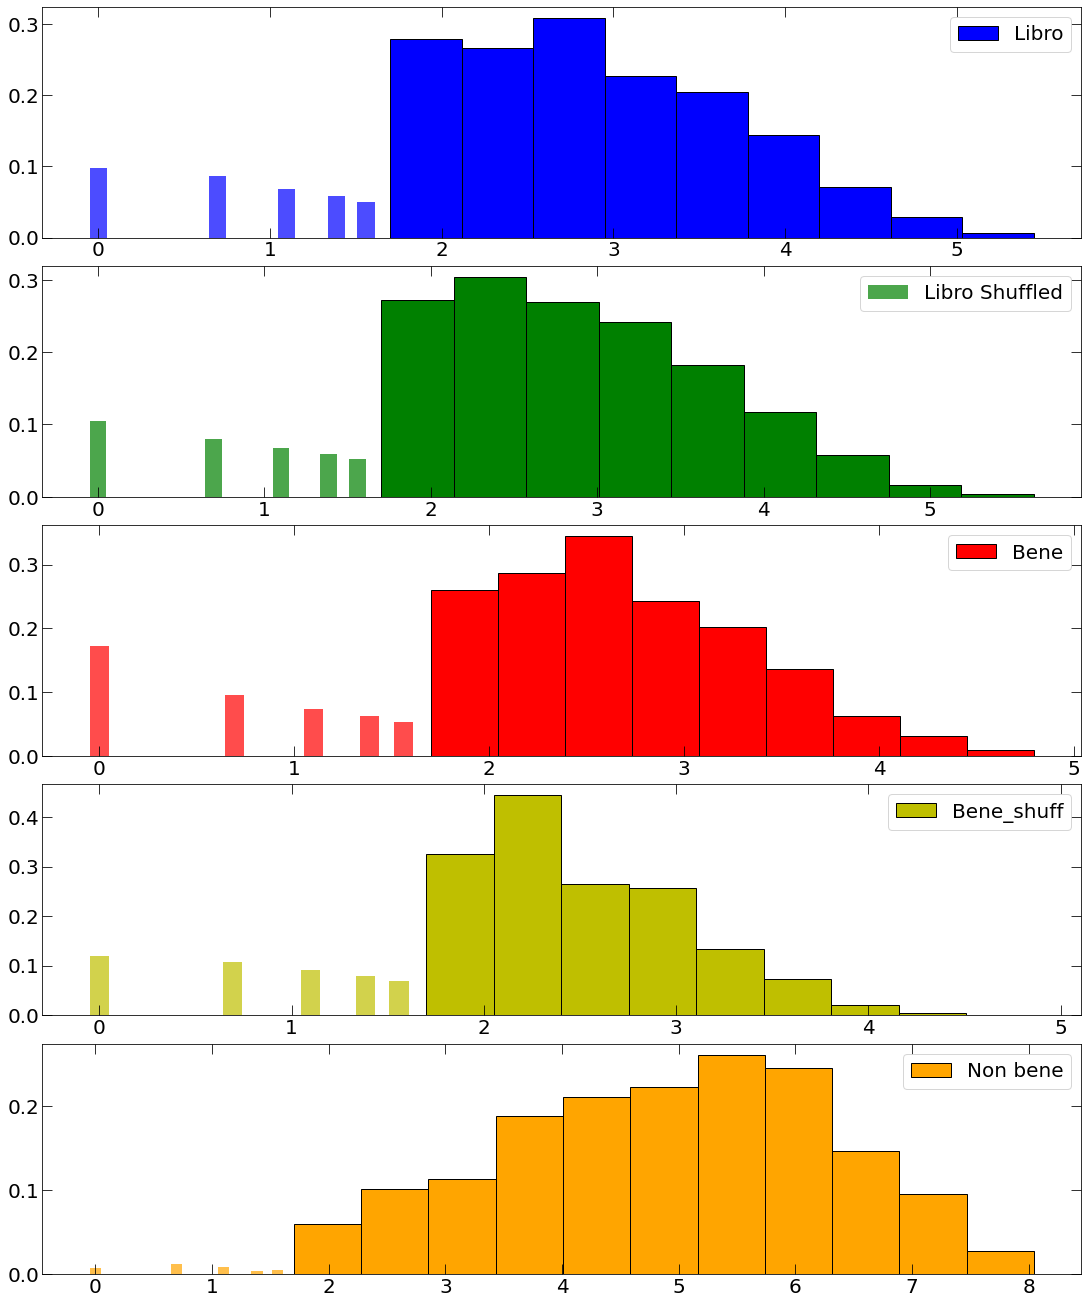

In [15]:
a_book,b_book = mixed_ddp(delay_,np.log(5),10,0.1)
a_book_sh,b_book_sh = mixed_ddp(delay_shuff,np.log(5),10,0.1)
a_6,b_6 = mixed_ddp(delay6,np.log(5),10,0.1)
a_6_sh,b_6_sh = mixed_ddp(delay6_sh,np.log(5),10,0.1)
a_4,b_4 = mixed_ddp(delay4,np.log(5),12,0.1)

fig, axs = plt.subplots(5,figsize=(15,18),constrained_layout=True)
axs[0].bar(a_book[0],a_book[1], width=0.1, align='center', color='blue', alpha=0.7)
axs[0].bar(b_book[0][:-1], b_book[1],width=np.diff(b_book[0]), align='edge',edgecolor='black' ,color='blue',label='Libro')
axs[0].xaxis.set_tick_params(labelsize=20)
axs[0].yaxis.set_tick_params(labelsize=20)
axs[0].tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=10)
axs[0].legend(fontsize="20" )


axs[1].bar(a_book_sh[0],a_book_sh[1], width=0.1, align='center', color='green', alpha=0.7,label='Libro Shuffled')
axs[1].bar(b_book_sh[0][:-1], b_book_sh[1],width=np.diff(b_book_sh[0]), align='edge',edgecolor='black' ,color='green')
axs[1].xaxis.set_tick_params(labelsize=20)
axs[1].yaxis.set_tick_params(labelsize=20)
axs[1].tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=10)
axs[1].legend(fontsize="20" )

axs[2].bar(a_6[0],a_6[1], width=0.1, align='center', color='red', alpha=0.7)
axs[2].bar(b_6[0][:-1], b_6[1],width=np.diff(b_6[0]), align='edge',edgecolor='black' ,color='red',label='Bene')
axs[2].xaxis.set_tick_params(labelsize=20)
axs[2].yaxis.set_tick_params(labelsize=20)
axs[2].tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=10)
axs[2].legend(fontsize="20" )

axs[3].bar(a_6_sh[0],a_6_sh[1], width=0.1, align='center', color='y', alpha=0.7)
axs[3].bar(b_6_sh[0][:-1], b_6_sh[1],width=np.diff(b_6_sh[0]), align='edge',edgecolor='black' ,color='y',label='Bene_shuff')
axs[3].xaxis.set_tick_params(labelsize=20)
axs[3].yaxis.set_tick_params(labelsize=20)
axs[3].tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=10)
axs[3].legend(fontsize="20" )

axs[4].bar(a_4[0],a_4[1], width=0.1, align='center', color='orange', alpha=0.7)
axs[4].bar(b_4[0][:-1], b_4[1],width=np.diff(b_4[0]), align='edge',edgecolor='black' ,color='orange',label='Non bene')
axs[4].xaxis.set_tick_params(labelsize=20)
axs[4].yaxis.set_tick_params(labelsize=20)
axs[4].tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=10)
axs[4].legend(fontsize="20" )
plt.show()